Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = "Aisse Torres Torres"
COLLABORATORS = "Bruna Costa"

---

In [3]:
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# HW 6a:  ODE Methods - Initial Value Problems

These questions will use a mixture of scipy routines and hand-rolled ODE solver methods (which you can use from the notes)

## Question 1 - The SIR model for Infectious diseases

ODE based models are a classical approach to understanding the spread of infectious diseases.

One of the pioneering models is the SIR model of [Kermack and McKendrick, (1927)](https://royalsocietypublishing.org/doi/10.1098/rspa.1927.0118) which is a mean-field theory for large populations that assumes the general population can be divided into three subgroups

* $S$: the number of susceptible patients
* $I$: the number of infected patients
* $R$: the number of recovered (or otherwise) patients

Given these definitions, the simplest dynamical systems for the three populations can be written

$$
\begin{aligned}
\frac{d S}{dt} &= -\alpha SI \\
\frac{d I}{dt} &= \alpha SI -\beta I\\
\frac{d R}{dt} &= \beta I \\
\end{aligned}
$$

where $\alpha$ is the infection rate per person, and $\beta$ is the recovery rate (hint: check the units) 

This is the original Kermack and McKendrick model.  We will discuss a host of themes and variations later.  If you are interested [Siettos and Russo, (2013)](https://doi.org/10.4161/viru.24041) provides a short overview of the much larger field of epidemiology modeling (although this paper has some significant mistakes with respect to the analysis of the Kermack and McKendrick model).

We will explore this problem through a combination of Analysis and Numerical methods and to use it to test different methods for ODE solvers.


**(a)** [4] First try to explain in words,  what this system of ODE's describes

The SIR model is used to estimate the number of people infected with a contagious illness over time. It assumes that there is a completely homogeneous population with a fixed size, instantaneous incubation period of the infecting agent and an equal length of the duration of infectivity. This model can be used to model the rise and fall of the number of infected people during an epidemic.

The time span (T) of the contagious illness is defined as the number of secondary infections caused by a primary infection—meaning the number of people infected by contact with a single infected person before the patient's death or recovery.  The value of T is given by:

$$
T= \frac {\alpha S}{\beta} 
$$

When T < 1, the system says that each person who contracts the disease will infect fewer than one person before dying or recovering:

$$ \frac{d I}{dt} < 0$$ 

When T > 1, each person who gets the disease will infect more than one person, so spread of the disease can be modeled by:

$$\frac{d I}{dt} > 0$$

### Some analysis.  

Here we will conduct some elementary dimensional analysis to reduce the parameter space.  More detailed analysis of this system can be found  Steve Strogatz' excellent text on [dynamical systems](https://smile.amazon.com/Nonlinear-Dynamics-Chaos-Applications-Nonlinearity/dp/0813349109/ref=dp_ob_image_bk)

**(b)** [2] Show that the SIR equations imply that   $S + I + R = N$  where $N$ is a constant (the total population of susceptible people that can all interact)

We are given the following information in the above problem space:

$$ \frac{dS}{dt} = -\alpha SI $$

$$ \frac{dI}{dt} = \alpha SI -\beta I $$

$$ \frac{dR}{dt} = \beta I \\ $$

By solving the system of linear equations we get: 

$$ \frac{dS}{dt} + \frac{d I}{dt} + \frac{d R}{dt} = -\alpha SI + \alpha SI -\beta I + \beta I $$

$$ \frac{d S}{dt} + \frac{d I}{dt} + \frac{d R}{dt} = 0 $$

$$ \frac{d}{dt}(S + I + R) = 0 $$

By assumption: 

$$ S + I + R = N $$

    Where N is a constant (the total population of susceptible people).

**(c)**  [4] Show that under  the change of variables (linear scaling of the variables)

$$
\begin{matrix}
    S = N s, & I = Ni, & R = Nr, & t = \tau\frac{1}{\alpha N} \\
\end{matrix}
$$

The original equations can be rewritten as the scaled equations 

$$
\begin{align}
    \frac{d s}{d\tau} &= -si\\
    \frac{d i}{d\tau} &= (s - s^*)i  \\
    \frac{d r}{d\tau} & = s^* i \\
\end{align}
$$

where 
$$
    s^* = \frac{\beta}{\alpha N}
$$



**Notes**,  
* if we write $s = S/N$ etc. then $s$ is simply the fraction of the total population that is susceptible.  
* Also show that $s + i + r = 1$.
* this scaling reduces a two-parameter problem to a one parameter problem where the only variable is $s^*$



We are given the following in the problem space: 

$$ \frac{dS}{dt} = -\alpha SI $$ 

$$ \frac{dI}{dt} = \alpha SI -\beta I $$

$$ \frac{d R}{dt} = \beta I $$

We can then substitue S, I, R and t with $ S = Ns, I = Ni, R = Nr, t = \tau\frac{1}{\alpha N} $ respectively. Giving us: 

$$ \frac{dS}{dt} = \frac{Nds}{\frac{1}{\alpha N}d\tau} \therefore \frac{dS}{dt} = \alpha N^2 \frac{ds}{d\tau} $$

$$ \frac{dI}{dt} = \frac{Ndi}{\frac{1}{\alpha N}d\tau} \therefore \frac{dI}{dt} \alpha N^2 \frac{di}{d\tau} $$

$$ \frac{dR}{dt} = \frac{Ndr}{\frac{1}{\alpha N}d\tau} \therefore \frac{dR}{dt} = \alpha N^2 \frac{dr}{d\tau} $$

Then also:

$$ -\alpha SI = -\alpha Ns Ni = -\alpha N^2 si $$ 

$$\alpha SI -\beta I = \alpha N^2 si -\beta Ni $$

$$ \beta I = \beta Ni $$

Then we are able to write the original system in the following way:

$$ \alpha N^2 \frac{ds}{d\tau} = -\alpha N^2 si $$

$$ \alpha N^2 \frac{di}{d\tau} = \alpha N^2 si -\beta Ni $$

$$ \alpha N^2 \frac{dr}{d\tau} = \beta Ni $$


Now we can divide both sides by $\alpha N^2$:

$$ \frac{\alpha N^2 \frac{ds}{d\tau}}{\alpha N^2} = \frac{-\alpha N^2 si}{\alpha N^2} \therefore \frac{ds}{d\tau} = -si $$

$$ \frac{\alpha N^2 \frac{di}{d\tau}}{\alpha N^2} = \frac{\alpha N^2 si}{\alpha N^2} \frac{-\beta Ni}{\alpha N^2} \therefore \frac{di}{d\tau} =si - \frac{-\beta i}{\alpha N} $$

$$ \frac{\alpha N^2 \frac{dr}{d\tau}}{\alpha N^2} = \frac{\beta Ni}{\alpha N^2} \therefore \frac{dr}{d\tau} = \frac{\beta i}{\alpha N} $$

Consider that $s^* = \frac{\beta}{\alpha N} $. Hence we have:

$$ \frac{ds}{d\tau} = -si $$

$$ \frac{di}{d\tau} = (s - s^*)i $$


$$ \frac{dr}{d\tau} =  s^* i $$

**(d)**  [2] Given that $s^*$ is a constant that only depends on the infection rate per capita $\alpha$, the recovery rate $\beta$ and the total population $N$,  interpret the equation for the change in the number of infections

$$
    \frac{d i}{d\tau} = (s - s^*) i
$$
as a function of the susceptible fraction of the population $s$.

When  $s > s^* $ the ratio $ \frac{di}{d\tau} $ is increasing. This means that the number of infections is also increasing. However, when $ s < s^* $ the ratio $ \frac{di}{d\tau} $ is decreasing, which also suggests that the number of infections is decreasing. When $ s = s^* $, $ \frac{di}{d\tau} = i $, which denotes the maximum number of infections.

### Numerical Methods

we will now explore the behavior of this model numerically using a range of our basic algorithms by solving the scaled dynamical system

$$
    \frac{d\mathbf{u}}{dt} = \mathbf{F}(t,\mathbf{u}, s^*),\quad\mathbf{u}(0)=\mathbf{u}_0
$$

where 
$$
    \mathbf{u} = \begin{bmatrix} s \\ i \\ r \\ \end{bmatrix}, \quad 
    \mathbf{F}(t,\mathbf{u},s^*) = \begin{bmatrix} -si \\ (s - s^*)i \\ s^*i \\ \end{bmatrix}
$$

**(e)** [4] Write function to return the RHS of the scaled dynamical system $\mathbf{F}(t,\mathbf{u},s^*)$ as a numpy array

In [4]:
def F(t, u, s_star):
    """ RHS of scaled SIR model of Kermack and McKendrick
    
    parameters
    ----------
        t: float
            time (just a dummy variable here because this is an autonomous system)
        u: numpy array
            array of scaled [ s, i, r ] values such that sum(u) = 1 
            (and s,i, r are fractions of the total population N)
        s_star: float
            scaled critical susceptible population = \beta/(\alpha N)
            
    returns:
        F(u): numpy array
    """
    return numpy.array([-u[0] * u[1], (u[0] - s_star) * u[1], s_star * u[1]])

In [5]:
# Let's assume the critical level of immunity is 60% of the total population
s_star = 0.6

# let there initially be .01 % infected cases and no recovered
t = 0.
i_0 = 1.e-4
u_0 = numpy.array([1. - i_0, i_0, 0.0])
answer = numpy.array([-9.999000000000001e-05,  3.999000000000001e-05, 6.000000000000000e-05])
numpy.testing.assert_allclose(F(t, u_0, s_star), answer)
print('success!')

success!


**(f)** [10] Use scipy.integrate.solve_ivp (imported above as solve_ivp),  to solve the scaled dynamical system above with for <font color="red">$s^* = 0.6$</font> and initial condition

$$
    \mathbf{u}_0 = \begin{bmatrix} 1 - i_0\\ i_0 \\ 0\\ \end{bmatrix}
$$

where $i_0=10^{-5}$ is the initially infected proportion of the available population $N$

Integrate for $t\in[0, 50]$ and make a plot showing the evolution of $s(t)$, $i(t)$, ${r}(t)$ vs. time 

**For full credit your plot should show the following**
* show the actual time-steps chosen by the adaptive solver as well as a smooth solution (use dense_output=True) 
* the total cumulative number of cases at any tie
* the time and infection level of the peak of the infection (hint: use the `events`, feature of solve_ivp)
* the maximum fraction of people infected

Explore the behavior of the solutions as a function of $s^*$ and $i_0$ and try to "flatten the curve" (we will try to make that more quantitative later). Also,  explore relative and absolute tolerances to convince yourself that your solutions are well resolved.

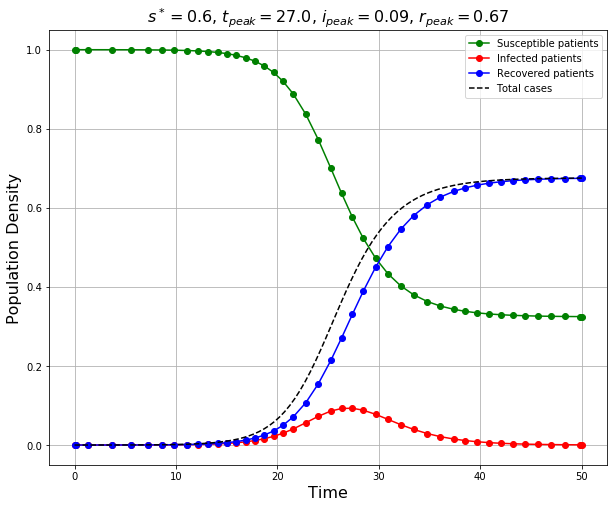

In [8]:
# first calculating using solve_ivp
t_span = (0., 50.)
i_0 = 1.e-5
u_0 = numpy.array([1. - i_0, i_0, 0.0])

f = lambda t, u : F(t, u, s_star)
event = lambda t, u: (u[0] - s_star)
result = solve_ivp(f, t_span, u_0, method='RK45', dense_output=True, events=event, rtol=1.e-6, atol=1.e-8)
tpeak = result.t_events[0][0]
upeak = result.sol(tpeak)
ipeak = upeak[1]

# graphing 

fig = plt.figure(figsize=(10, 8))
axes = fig.add_subplot(1, 1, 1)
t = numpy.linspace(t_span[0], t_span[1], 100)

axes.plot(result.t, result.y[0],'go-', label='Susceptible patients')
axes.plot(result.t, result.y[1],'ro-', label='Infected patients')
axes.plot(result.t, result.y[2],'bo-', label='Recovered patients')
axes.plot(t, u_0[1] + u_0[0] - result.sol(t)[0],'k--', label='Total cases')
axes.set_ylabel('Population Density', fontsize=16)
axes.set_xlabel('Time', fontsize=16)
axes.set_title('$s^* = {}$, $t_{{peak}}={:3.1f}$, $i_{{peak}}= {:3.2f}$, $r_{{peak}}={:3.2f}$'.format
               (s_star, tpeak, ipeak, result.sol(t[-1])[2]), fontsize=16)
legend = axes.legend()
axes.grid()

**(g)** [8] Write your own code to solve the same system using any constant step-size method we discussed in class that is higher than 2nd order (you can use or modify any of the example codes from the notes and make sure it works for vector valued functions.   Your code should be able to use your function $F$ defined above. Make sure to choose a method that will work for the non-linear right-hand-side. We will test it against the output from solve_ivp with N steps uniform steps in $t\in[0,50]$.  What is the minimum number of steps does your routine take to pass the tests with a relative error of $10^{-4}$ and absolute error of $10^{-5}?.  You can control the number of steps taken with the `N=??` defined at the end of the cell.  **Extra Credit** determine the convergence rate of your method.

In [9]:
def my_ode_solver(f, t_span, u0, N):
    """ implement constant step size ODE integrator using a ________ method
    
    parameters
    ----------
        f: calleable
            vector valued function with interface f(t,u) where u is the state vector
        t_span: float list or array (or tuple)
            array holding range of times to integrate over t_span = [ t_min, t_max]
        u0:  numpy array
            array of initial conditions
        N: integer
            number of time steps to take 
            
    returns:
    --------
        t: numpy array
            array of timesteps from t_min to t_max of length N
        u: numpy array of shape (len(u0), len(t))
            solution array,  the solution at timestep i should be u[:,i]
    """
    
    t = numpy.linspace(t_span[0], t_span[1], N)
    delta_t = t[1] - t[0]
    s_star = 0.6
    
    u = numpy.empty([len(u_0), len(t)])
    u[:, 0] = u0
    
    for (n, t_n) in enumerate(t[1:]):
        K_1 = delta_t * f(t_n, u[:,n])
        K_2 = delta_t * f(t_n + delta_t/2., u[:,n] + K_1/2.)
        K_3 = delta_t * f(t_n + delta_t/2., u[:,n] + K_2/2.)
        K_4 = delta_t * f(t_n + delta_t, u[:,n] + K_3)
        u[:,n+1] = u[:,n] + 1./6. * (K_1 + 2.*( K_2 + K_3) + K_4)
        
    return t, u 

# you can control the number of steps used here
N = 100 


In [10]:
s_star = 0.6
f = lambda t, u: F(t, u, s_star)

t_span = [0., 50.]
i_0 = 1.e-5
u_0 = numpy.array([1. - i_0, i_0, 0.0])


t, u = my_ode_solver(f, t_span, u_0, N)

sol = solve_ivp(f, t_span, u_0, method='RK45', dense_output=True, rtol=1.e-6, atol = 1.e-8)

numpy.testing.assert_allclose(u, sol.sol(t), rtol=1.e-4, atol=1.e-5)
print('success!')

success!


In [11]:
s_star = 0.6
f = lambda t, u: F(t, u, s_star)

t_span = [0., 50.]
i_0 = 1.e-5
u_0 = numpy.array([1. - i_0, i_0, 0.0])


t, u = my_ode_solver(f, t_span, u_0, N)

# There is a hidden line here implementing sol = solve_ivp to get the "True" solution

numpy.testing.assert_allclose(u, sol.sol(t), rtol=1.e-4, atol=1.e-5)
print('success!')

success!


**(h)** [2] Reproduce your figure from the scipy version (without events)

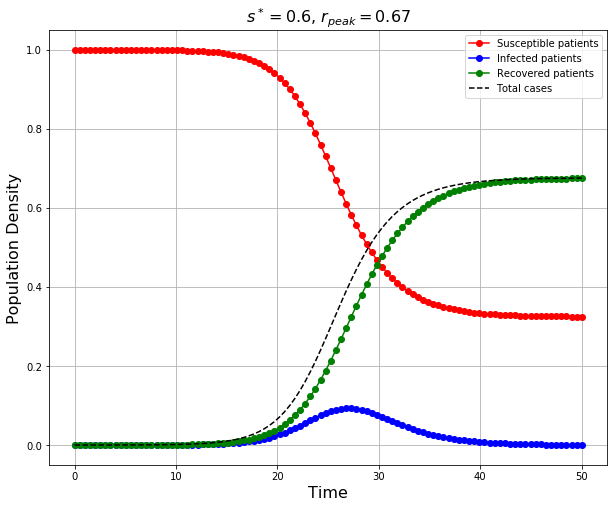

In [23]:
f = lambda t, u: F(t, u, s_star)

N = 100
t_span = (0., 50.)
i_0 = 1.e-5
u_0 = numpy.array([1. - i_0, i_0, 0.0])
t, u = my_ode_solver(f, t_span, u_0, N)

s = u[0]
i = u[1]
r = u[2]
tnew = numpy.linspace(0, 50, N)

fig = plt.figure(figsize=(10, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(tnew, s,'ro-', label='Susceptible patients')
axes.plot(tnew, i,'bo-', label='Infected patients')
axes.plot(tnew, r,'go-', label='Recovered patients')
axes.plot(t, u_0[1] + u_0[0] - result.sol(t)[0],'k--', label='Total cases')
axes.set_xlabel('Time', fontsize=16)
axes.set_ylabel('Population Density', fontsize=16)
axes.set_title('$s^* = {}$, $r_{{peak}}={:3.2f}$'.format(s_star, result.sol(t[-1])[2]),fontsize=16)
axes.grid()
axes.legend()

### Themes and Variations [15]

The classical Kermack and McKendric model is only one of a vast set of models used to model the spread of infection disease but assumes homogeneous mixing across the entire population.  In addition there are lots of things  to explore with even the simplest SIR model.   Try one (or more) of the following problems or come up with your own problem.  You may work in groups

* Choose a fixed value of $N$ for the maximum susceptible population. Assume that maximum hospital capacity is achieved when the number of infected patients reaches $i_{max}$.  Construct a root-finding problem to find the value of $s^*$ required to keep  the peak number of infected cases $i_{peak} <= i_{max}$. 

* Consider the possibility of re-infection (ugh!).  One model of this assumes that recovered patients can become susceptible again at some rate $\lambda$.  Modify the original SIR model to include this possibility and construct a new scaled set of equations.  This will now be a 2 parameter dynamical system ($s^*$ and another parameter say $\lambda^*$.  Explore the behavior of this new problem.

* There are lots of data on aggregated cases by country, state, and county.  Find some time-series data and attempt to fit the two parameters $\alpha N$ (which controls the time scale) and $\beta$ which controls $s*$. (A good source of data and a thorough discussion of what we know and don't know  is [Our world in Data](https://ourworldindata.org/coronavirus).

* Read [Siettos and Russo, (2013)](https://doi.org/10.4161/viru.24041)  which reviews a range of epidemiology models including Stochastic SIR models. Pick another model and propose how to implement it.  Better yet, implement it

* Something Numerical: Write an adaptive time stepper built around any two single-step multi-stage schemes and compare your solution to solve_ivp.

* Your own best ideas!



In [39]:
# solve ivp 

N = 1.e5
i0 = 1.e-5
u0 = numpy.array([1-i0, i0, 0])
t = (0., 50.)
tnew = numpy.linspace(0, 50)

f = lambda t, u: F(t, u, s_star)

sol = solve_ivp(f, t, u0, method='RK45', dense_output=True, rtol=1.e-6, atol = 1.e-8)
solN = numpy.array(result.sol(tnew))
s = solN[0]
i = solN[1]
r = solN[2]

# finding max_i  

i_peak = max(i)
max_i = i.argmax()
s_new = s[max_i]

s_star = s_new
max_I = int(N * i_peak)

print('s_star = {}, peak_i = {}, max_I = {}'.format(s_star, i_peak, max_I))

s_star = 0.6242485442714641, peak_i = 0.09303348027194511, max_I = 9303


## Question 2: Derivation of Adams-Moulton

**(a)** [15] Show that the Adams-Moulton 2-step method can be derived by considering conditions derived from the truncation error expression for multi-step methods

From Adams-Moulton 2-step method we have that $\alpha_2 = \alpha_1 = 1$ and $\alpha_0 = 0$, satisfy the first condition:

$$ \sum_{j=0}^2 \alpha_j = 0 $$

Then the truncation error is used to solve for $\beta_0, \beta_1, \beta_2$, therefore:

$$ 0 = \sum_{j=0}^2 \frac{1}{q!} j^q \alpha_j - \frac{1}{(q-1)!} j^{q-1} \beta_j $$

By expanding: 

$$ 0 = \sum_{j=0}^2 j \alpha_j - \beta_j = -\beta_0 -\beta_1 - \beta_2 + \alpha_1 + 2\alpha_2 = -\beta_0 -\beta_1 - \beta_2 + 1  $$

$$ 0 = \sum_{j=0}^2 \frac{1}{2!} j^2 \alpha_j - j\beta_j = \frac{3}{2} - \beta_1 -2\beta_2 $$

$$ 0 = \sum_{j=0}^2 \frac{1}{3!} j^3 \alpha_j - \frac{1}{2!} j^2 \beta_j = -\frac{1}{2} \beta_1 + \frac{7}{6}  - 2\beta_2 $$

Now simplifying:

$$ 1 = \beta_0 +\beta_1 + \beta_2 $$

$$ \frac{3}{2} = \beta_1 + 2\beta_2 $$

$$\frac{7}{3} = \beta_1 + 4\beta_2 $$

To solve for the third order, we reach q = 3: 

$$ \beta_1 = \frac{3}{2} - 2\beta_2 $$

$$ \frac{7}{3} = \frac{3}{2} - 2\beta_2 + 2\beta_2 \rightarrow $$

$$ \beta_2 = \frac{5}{12} $$

$$ \beta_1 = \frac{2}{3} $$

$$\beta_0 = 1 - \beta_1 - \beta_2 = -\frac{1}{12} $$

Which gives us Adam's Method: 

$$ U_{n+2} = U_{n+1} + \frac{\delta t}{12} (-f_n +8f_{n+1} + 5f_{n+2}) $$



**(b)** [15] **Extra Credit** We can also derive linear multi-step methods more generally by approximating either the unknown function $u(t)$ or the right-hand side function $f(t, u)$ as an interpolating polynomial and integrating both sides of the resulting approximation to derive the method.  Using a quadratic polynomial derive the coefficients for Adams-Moulton 2-step.  Note that here we will assume when interpolating $f(t, u)$ that the interpolant is in terms of points $(t_i, f(t_i))$.

YOUR ANSWER HERE